**IMBD TOP 200: By Thabo Pilusa**

In [ ]:
import pandas as pd
import sqlite3
import requests
import io

I don't like to install huge files on my device, so import the data file from a url

In [7]:
dataset_url = 'https://raw.githubusercontent.com/itiievskyi/IMDB-Top-250/master/imdb_top_250.csv'


# Fetch the data from the URL
response = requests.get(dataset_url)
response.raise_for_status()  # Raise an exception for HTTP errors

# Use io.StringIO to convert the content into a file-like object
data = io.StringIO(response.text)

# Read the dataset into a DataFrame
df = pd.read_csv(data)

# Display the first few rows of the DataFrame
print(df.head())


   Unnamed: 0                     Title  Year  \
0           1  The Shawshank Redemption  1994   
1           2             The Godfather  1972   
2           3    The Godfather: Part II  1974   
3           4           The Dark Knight  2008   
4           5              12 Angry Men  1957   

                               Genre  Duration    Origin  \
0                              Drama  2h 22min       USA   
1                      Drama | Crime  2h 55min       USA   
2                      Drama | Crime  3h 22min       USA   
3  Drama | Action | Thriller | Crime  2h 32min  USA | UK   
4                              Drama  1h 36min       USA   

               Director  IMDB rating  Rating count  \
0        Frank Darabont          9.3       2030817   
1  Francis Ford Coppola          9.2       1392322   
2  Francis Ford Coppola          9.0        964841   
3     Christopher Nolan          9.0       1998623   
4          Sidney Lumet          8.9        571145   

                   

 Create the SQLite atabase for storing the **data** bold text **bold text**

In [15]:
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('imdb_top_200_movies.db')

# Store the DataFrame in a table named 'movies' and replace if aalready exists
df.to_sql('movies', conn, if_exists='replace', index=False)

print("Dataset successfully stored in the database!")


Dataset successfully stored in the database!


Now that we’ve stored the data, let’s run some SQL queries.


In [9]:
#Count total movies in the database
query = "SELECT COUNT(*) FROM movies"
result = pd.read_sql_query(query, conn)
print(result)


   COUNT(*)
0       250


Hmmm, let's see which are the top 10 movies of all time

In [21]:
query = """
SELECT Title, Year, "IMDB rating"
FROM movies
ORDER BY "IMDB rating" DESC
LIMIT 10;
"""

top_movies = pd.read_sql_query(query, conn)
print(top_movies)


                                           Title  Year  IMDB rating
0                       The Shawshank Redemption  1994          9.3
1                                  The Godfather  1972          9.2
2                         The Godfather: Part II  1974          9.0
3                                The Dark Knight  2008          9.0
4                                   12 Angry Men  1957          8.9
5                               Schindler's List  1993          8.9
6  The Lord of the Rings: The Return of the King  2003          8.9
7                                   Pulp Fiction  1994          8.9
8                Il buono, il brutto, il cattivo  1966          8.9
9                                     Fight Club  1999          8.8


Let's find all movies directed by christopher nolan

In [22]:
query = """
SELECT * FROM movies
WHERE Director = 'Christopher Nolan'
"""
nolan_movies = pd.read_sql_query(query, conn)
print(nolan_movies)


   Unnamed: 0                  Title  Year                              Genre  \
0           4        The Dark Knight  2008  Drama | Action | Thriller | Crime   
1          14              Inception  2010      Adventure | Action | Thriller   
2          32           Interstellar  2014                  Drama | Adventure   
3          49           The Prestige  2006         Drama | Thriller | Mystery   
4          51                Memento  2000                 Thriller | Mystery   
5          67  The Dark Knight Rises  2012                  Action | Thriller   
6         116          Batman Begins  2005      Adventure | Action | Thriller   

   Duration    Origin           Director  IMDB rating  Rating count  \
0  2h 32min  USA | UK  Christopher Nolan          9.0       1998623   
1  2h 28min  USA | UK  Christopher Nolan          8.8       1778263   
2  2h 49min  USA | UK  Christopher Nolan          8.6       1240319   
3  2h 10min  USA | UK  Christopher Nolan          8.5       1032561

Count down Movies in the top 10 genres

                                Genre  Movie_Count
0                               Drama           26
1                       Drama | Crime           14
2            Drama | Thriller | Crime           10
3                         Drama | War            9
4                     Drama | Romance            8
5  Drama | Thriller | Mystery | Crime            6
6                      Drama | Comedy            6
7        Adventure | Fantasy | Action            6
8                    Drama | Thriller            5
9         Drama | Biography | History            5


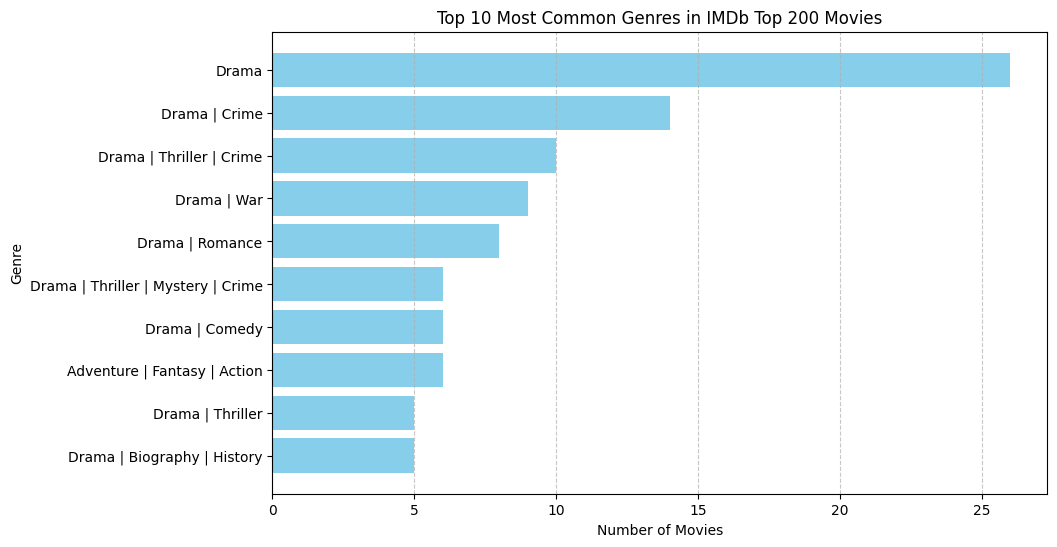

In [25]:

# SQL Query to get top 10 genres
query = """
SELECT Genre, COUNT(*) AS Movie_Count
FROM movies
GROUP BY Genre
ORDER BY Movie_Count DESC
LIMIT 10;
"""

# Fetch the data
top_genres = pd.read_sql_query(query, conn)
# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_genres["Genre"][::-1], top_genres["Movie_Count"][::-1], color='skyblue')
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Top 10 Most Common Genres in IMDb Top 200 Movies")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


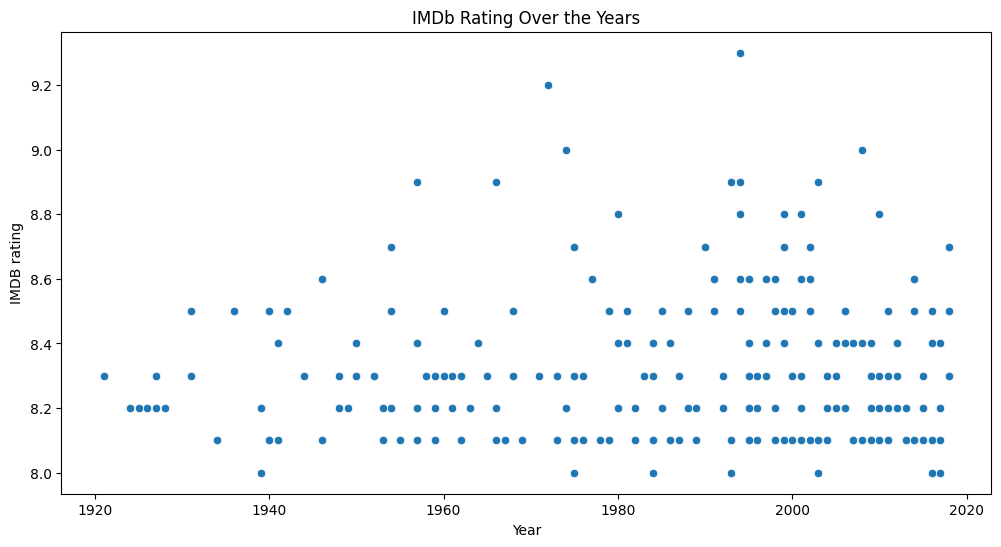

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Year'], y=df['IMDB rating'])
plt.title("IMDb Rating Over the Years")
plt.show()
